Invetigate High Pay Skills

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#Filter to Data Anayst Jobs in United States
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#Dropna from column        
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [5]:
##We gonna need the skills for this, so lets just explode it
df_DA_US = df_DA_US.explode('job_skills')


In [8]:
## We need a count og skills and a median of salary, so lets do it by grouping and assign it to new variable
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [ ]:
#Now, we are going to create two dataframes from our grouping, first of top 10 median salary and second for the top skills count

#Top 10 pay salary
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [44]:
#Top 10 skills count, at last we sorted it with median again to get correctly formatted
df_DA_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)
df_DA_top_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


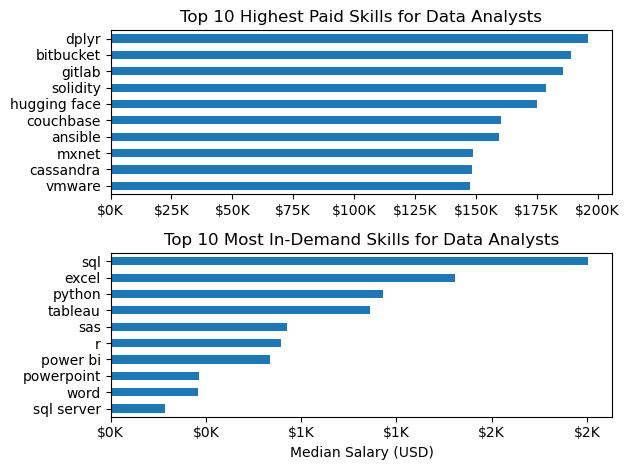

In [47]:
# Now we have to plot thse two on same chart using subplot

fig, ax = plt.subplots(2,1)
#We are not giving here x='job_Skills' in both because pandas will automatically use the index of the DataFrame as the axis labels.
df_DA_top_pay.plot(kind='barh',  y='median', ax=ax[0], legend=False )
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_top_skills.plot(kind='barh',  y='count', ax=ax[1],legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


#ax[1].set_xlim(ax[0].get_xlim())


🔑 Rule of Thumb

.sort_values(ascending=False) → ensures data is sorted correctly.

.invert_yaxis() → ensures descending order is displayed correctly in bar